# Assignment 3 Code
Nathan North

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
def draw_line(img, pos):
    (row, col) = img.shape
    for i in range(row):
        for j in range(col):
            if j == pos:
                img[i, j] = 255
    return img
        

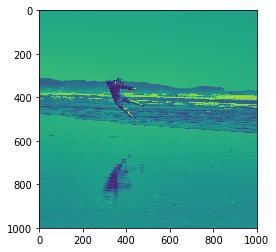

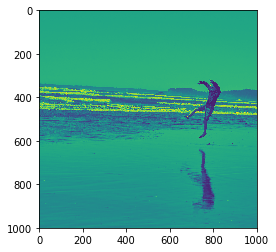

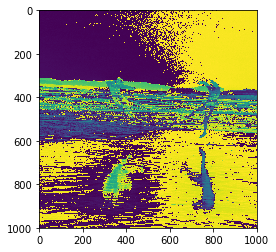

In [15]:
image1 = "DSC09159.JPG"
image2 = "DSC09163.JPG"

img = cv2.imread(image1)
#img = cv2.imread(image1, cv2.IMREAD_GRAYSCALE)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Rotate Image
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 4, 1)
img = cv2.warpAffine(img ,M, (cols, rows))
img = np.fliplr(img)

# Perform cropping
img = img[550:3550, 2500:5500, :]

# Re-size
SIZE_REDUCE = 3
height, width = img.shape[:2]
height, width = (int(height/SIZE_REDUCE), int(width/SIZE_REDUCE))
img = cv2.resize(img, (height, width), interpolation = cv2.INTER_CUBIC)

cv2.imwrite("black.jpg", img)
imgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(imgb)
plt.show()





img2 = cv2.imread(image2)
#img2 = cv2.imread(image2, cv2.IMREAD_GRAYSCALE)
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Crop Image
img2 = img2[400:3400, 1000:4000, :]

# Re-size image
# height, width = img2.shape[:2]
img2 = cv2.resize(img2, (height, width), interpolation = cv2.INTER_CUBIC)


cv2.imwrite("white.jpg", img2)
img2b = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(img2b)
plt.show()





START = 0.49
END = 0.65

region_start = int(START * width)
region_end = int(END * width)

img3 = imgb - img2b
img3 = draw_line(img3, region_start)
img3 = draw_line(img3, region_end)
cv2.imwrite("subtracted.jpg", img3)


plt.figure()
plt.imshow(img3)
plt.show()

In [16]:
# Make the Filter

(r, c) = img3.shape

indicies = []

for i in range(r):
    diff = img3[i, 0]
    # diff = 255.0
    index = region_start
    for j in range(region_start, region_end):
        if img3[i, j] < diff:
            index = j
            
    indicies.append(index)
    
filt = np.zeros((r, c), dtype="float64")

for i in range(r):
    for j in range(c):
        if j > indicies[i]:
            filt[i, j] = 255.0

cv2.imwrite("mask.jpg", filt)
        


#img = cv2.imread('opencv_logo.png')

#kernel = np.ones((5,5),np.float32)/25
#dst = cv2.filter2D(img,-1,kernel)


True

In [17]:
# Simple attempt at a pure cut

cutImg = np.zeros((r, c, 3), dtype="float64")
for i in range(r):
    for j in range(c):
        if filt[i, j] == 0:
            cutImg[i, j, :] = img[i, j, :]
        else:
            cutImg[i, j, :] = img2[i, j, :]
            
cv2.imwrite("cut.jpg", cutImg)

True